In [10]:
%%writefile xas.py
#-*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def convert(route):
    assert type(route) == str
    _file = [i.strip() for i in open(route)]
    s, gamma = [float(i.split(' ')[-1]) for i in _file[:2]]
    data = [map(float, i.split('   ')) for i in _file[2:]]
    x, y = [], []
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    return [x, y]#, s, gamma

def _display_xas(data, fig_size, save='', pics=0, fontsize=10, xscale=None):
    plt.figure(figsize=fig_size)
    plt.grid(linestyle='--', linewidth=0.5)
#     plt.title(name, fontsize=20)
    plt.ylabel('Intensity', fontsize=fontsize)
    plt.xlabel('Energy [eV]', fontsize=fontsize)
    if xscale:
        indx = np.where(np.array(data[0][0]) > max(xscale))[0][0]
        plt.xlim(xscale)
        plt.ylim(0.0, 1.1 * max(data[0][1][:indx-1]))
    plt.plot(data[0][0], data[0][1], '--', color='grey', linewidth=3)
    plt.tick_params(labelsize=fontsize)
    plt.yticks(fontsize=0)
    try:
        plt.plot(data[1][0], data[1][1], color='green', linewidth=5)
#         plt.legend(['fitting', 'not fitting'], fontsize=18)
    except:
        pass
#         plt.legend([name], fontsize=18)
    if save:
        plt.savefig('Pictures/XAS/' + save, dpi=256)
        plt.close()

def _display_xas_mult(names, data, fig_size, save=''):
    length = len(names)
    plt.figure(figsize=fig_size)
    for i in range(length): 
        plt.subplot(length,1,i + 1)
        plt.grid(linestyle='--', linewidth=0.5)
        plt.xticks(np.linspace(-2, 22, 25))
        plt.title(names[i], fontsize=14)
        plt.xlabel('Energy [eV]', fontsize=14)
        plt.plot(data[i][0][0], data[i][0][1], '--', color='green', linewidth=4)
        try:
            plt.plot(data[i][1][0], data[i][1][1], color='red', linewidth=5 )
            plt.legend(['not fitting', 'fitting'], fontsize=14)
        except:
            pass
    if save:
        plt.savefig('Pictures/XAS/' + save, dpi=256)
        plt.close()
        


Overwriting xas.py


In [2]:
route = ['BBO_gr/', 'BBO_exc/', 'BKBO_gr_dop/', 'BKBO_exc_dop/' ]
names_bbo_gr = ['Ba_4d', 'O_1s', 'Bi_3+', 'Bi_5+']
names_bbo_exc = ['Ba_4d', 'O_1s', 'Bi']

In [349]:
data = convert('BBO_gr/Bi.txspec')
# _display_xas('Bi_core', [data], (15, 7), 'BBO_gr_Bi_core.jpg')

In [350]:
data = convert('BBO_gr/Bi3+_core.txspec')
# _display_xas('Bi_core', [data], (15, 7), 'BBO_gr_Bi_3+_core.jpg')

### BBO_gr

In [3]:
d1 = [convert('BBO_gr/Ba_4d_unbr.xspec'), convert('BBO_gr/Ba_4d.xspec')]
d2 = [convert('BBO_gr/O_1s_unbr.xspec'), convert('BBO_gr/O_1s.xspec')]
d3 = [convert('BBO_gr/Bi_3+.txspec'), convert('BBO_gr/Bi_3+.xspec')]
d4 = [convert('BBO_gr/Bi_5+.txspec'), convert('BBO_gr/Bi_5+.xspec')]

# _display_xas_mult(names_bbo_gr[:2], [d1, d2], (12, 16), 'BBO_gr_Ba_O.jpeg')
# _display_xas_mult(names_bbo_gr[2:], [d3, d4], (12, 16), 'BBO_gr_Bi.jpeg')

In [133]:
_display_xas(data=d2, fig_size=(16,10),fontsize=24, save='BBO_gr_O_1s')
_display_xas(data=d3, fig_size=(16,10),fontsize=24, xscale=(-2.5, 11), save='BBO_gr_Bi_3+_trunc')
_display_xas(data=d3, fig_size=(16,10),fontsize=24, save='BBO_gr_Bi_3+')
_display_xas(data=d4, fig_size=(16,10),fontsize=24, xscale=(-2.5, 11), save='BBO_gr_Bi_5+_trunc')
_display_xas(data=d4, fig_size=(16,10),fontsize=24, save='BBO_gr_Bi_5+')

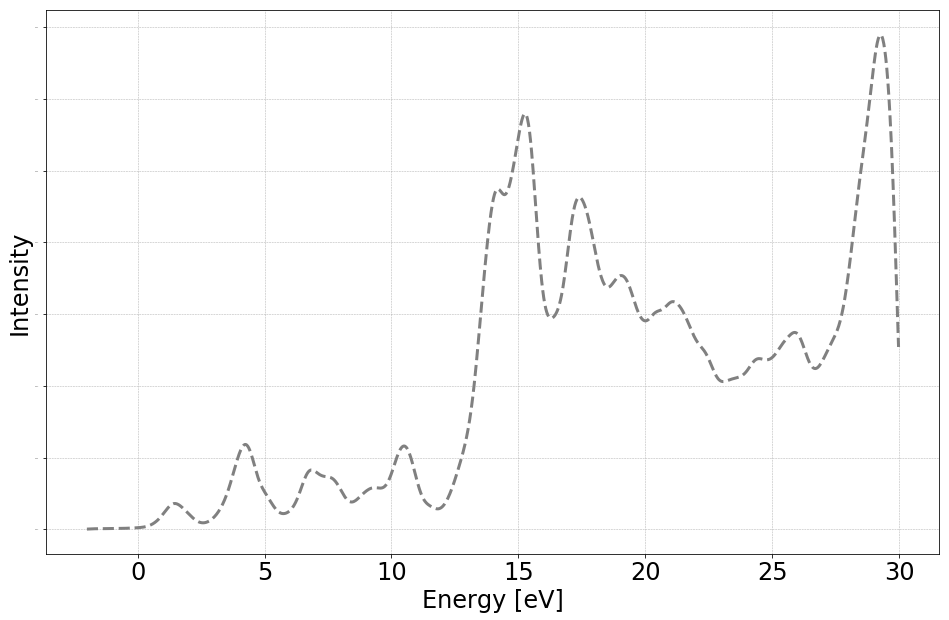

In [4]:
d0 = [convert('BBO_gr/BBO_gr.xspec')]
_display_xas(data=d0, fig_size=(16,10),fontsize=24)

###  BBO_exc

In [353]:
d1 = [convert('BBO_exc/Ba_4d_unbr.xspec'), convert('BBO_exc/Ba_4d.xspec')]
d2 = [convert('BBO_exc/O_1s_unbr.xspec'), convert('BBO_exc/O_1s.xspec')]
d3 = [convert('BBO_exc/Bi.txspec')]

# _display_xas_mult(names_bbo_exc[:2], [d1, d2], (12, 16), 'BBO_exc_Ba_O.jpeg')
# _display_xas_mult(names_bbo_exc[2:], [d3], (12, 8), 'BBO_exc_Bi.jpeg')

### BKBO_gr

In [117]:
w = 'BKBO_gr_dop/'
names_bkbo = ['Ba_4d', 'O_1s', 'K_2p', 'Bi5_4f', 'Bi6_4f', 'Bi7_4f', 'Bi8_4f' ]

In [134]:
d1 = [convert(w + 'Ba_4d_unbr.xspec'), convert(w + 'Ba_4d.xspec')]
d2 = [convert(w + 'O_1s_unbr.xspec'), convert(w + 'O_1s.xspec')]
d3 = [convert(w + 'Bi5_4f_unbr.xspec'), convert(w + 'Bi5_4f.xspec')]
d4 = [convert(w + 'Bi6_4f_unbr.xspec'), convert(w + 'Bi6_4f.xspec')]
d5 = [convert(w + 'Bi7_4f_unbr.xspec'), convert(w + 'Bi7_4f.xspec')]
d6 = [convert(w + 'K_2p_unbr.xspec'), convert(w + 'K_2p.xspec')]
d7 = [convert(w + 'Bi8_4f.txspec')]

# _display_xas_mult(names_bkbo[:3], [d1, d2, d6], (12, 18), 'BKBO_gr_Ba_O_K.jpeg')
# _display_xas_mult(names_bkbo[3:], [d3, d4, d5, d7], (12, 24), 'BKBO_gr_Bi.jpeg')

In [135]:
_display_xas(data=d2, fig_size=(16,10),fontsize=24, save='BKBO_gr_O_1s')
_display_xas(data=d3, fig_size=(16,10),fontsize=24, xscale=(-2.5, 11), save='BKBO_gr_Bi5_4f_trunc')
_display_xas(data=d3, fig_size=(16,10),fontsize=24, save='BKBO_gr_Bi5_4f')
_display_xas(data=d4, fig_size=(16,10),fontsize=24, xscale=(-2.5, 11), save='BKBO_gr_Bi6_4f_trunc')
_display_xas(data=d4, fig_size=(16,10),fontsize=24, save='BKBO_gr_Bi6_4f')
_display_xas(data=d5, fig_size=(16,10),fontsize=24, xscale=(-2.5, 11), save='BKBO_gr_Bi7_4f_trunc')
_display_xas(data=d5, fig_size=(16,10),fontsize=24, save='BKBO_gr_Bi7_4f')

### BKBO_exc

In [50]:
w = 'BKBO_exc_dop/'
names_bkbo = ['Ba_4d', 'O_1s', 'K_2p', 'Bi5_4f', 'Bi6_4f', 'Bi7_4f', 'Bi8_4f' ]

In [51]:
d1 = [convert(w + 'Ba_4d_unbr.xspec'), convert(w + 'Ba_4d.xspec')]
d2 = [convert(w + 'O_1s_unbr.xspec'), convert(w + 'O_1s.xspec')]
d3 = [convert(w + 'Bi5.txspec')]
d4 = [convert(w + 'Bi6_unbr.xspec'), convert(w + 'Bi6.xspec')]
d5 = [convert(w + 'Bi7_unbr.xspec'), convert(w + 'Bi7.xspec')]
d6 = [convert(w + 'K_2p_unbr.xspec'), convert(w + 'K_2p.xspec')]
d7 = [convert(w + 'Bi8_unbr.xspec'), convert(w + 'Bi8.xspec')]

_display_xas_mult(names_bkbo[:3], [d1, d2, d6], (12, 18), 'BKBO_exc_Ba_O_K.jpeg')
_display_xas_mult(names_bkbo[3:], [d3, d4, d5, d7], (12, 24), 'BKBO_exc_Bi.jpeg')

### Compare

In [354]:
def _compare_xas(data, data2, orb, xlab, ylab, xscale=None, figsize=(20,10), fontsize=10, save=None):
    plt.figure(figsize=figsize)
    plt.grid(linestyle='--', linewidth=0.5)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.tick_params(labelsize=fontsize)
    plt.yticks(fontsize=0)
    if xscale:
        indx = np.where(np.array(data[0]) > max(xscale))[0][0]
        plt.xlim(xscale)
        if max(data[1][:indx-1]) > max(data2[1][:indx-1]):
            plt.ylim(0.0, 1.1 * max(data[1][:indx-1]))
        else:
            plt.ylim(0.0, 1.1 * max(data2[1][:indx-1]))
    plt.plot(data[0], data[1], 'green', linewidth=4)
    plt.plot(data2[0], data2[1], 'orange', linewidth=4)
    plt.legend(['BBO', 'BKBO'],  fontsize=fontsize)
    if save:
        plt.savefig('Pictures/XAS/' + save, dpi=256)
        plt.close()  

In [360]:
w_dop = 'BKBO_exc_dop/'
w = "BBO_exc/"
d1 = convert(w_dop + 'O_1s.xspec')
d2 = convert(w + 'O_1s.xspec')

In [341]:
bi_names = ['Bi' + str(i) + '_4f.xspec' for i in range(5, 8)]

In [342]:
d3 = np.array(convert(w_dop + bi_names[-1]))
for i in bi_names:
    d3 = d3 + np.array(convert(w_dop + i))
d4 = np.array(convert(w + 'Bi_3+.xspec')) + np.array(convert(w + 'Bi_5+.xspec'))
d3[0] /= 4
d3[1] /= 2
d4[0] /= 2

In [361]:
_compare_xas(d2, d1, ["BBO", "BKBO"], 'Energy [eV]', 'Intensity', fontsize=24, save='compare_O_exc_xas')
# _compare_xas(d4, d3, ["BBO", "BKBO"], 'Energy [eV]', 'Intensity', fontsize=24, save='compare_Bi_xas')
# _compare_xas(d4, d3, ["BBO", "BKBO"], 'Energy [eV]', 'Intensity', xscale=(-2, 11), fontsize=24, save='compare_Bi_xas_trunc')

## DOS 

In [9]:
%%writefile dos.py
#-*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def convert_dos(route):
    '''
    Переводит dos-file в DataFrame
    '''
    f = open(route)
    _title = [next(f).strip() for _ in range(3)] 
    title = _title[2][1:].replace('-', '_').replace(':', '_').split()
    title = [title[i] if not title[i][0].isdigit() else title[i][2:] + title[i][0:1] for i in range(len(title))]
    data = [map(float, line.split()) for line in f]
    df = pd.DataFrame(data=data, columns=title)
    return df

def _merge(route, num):
    '''
    Соединяет все данные в один DataFrame
    '''
    routes_dos = [route + '/' + route + '.dos' + str(i) + 'ev' for i in range(1, num + 1)]
    print routes_dos
    dfs = [convert_dos(i) for i in routes_dos]
    data = dfs[0]
#     print data.head()
    for i in range(0, num):
        data = pd.merge(data, dfs[i])
#         print data.head()
    return data

def _display_dos(df, orbital, name, fig_size, fontsize=10, xscale=None, save=None):
    plt.figure(figsize=fig_size)
    if xscale:
        plt.xlim(xscale)
        plt.ylim(0.0, 1.1 * df[orbital][df['ENERGY'] < xscale[1]][df['ENERGY'] > xscale[0]].max())
    plt.grid(linestyle='--', linewidth=0.5)
    plt.xlabel('Energy [eV]', fontsize=fontsize)
    plt.ylabel('DOS', fontsize=fontsize)
    plt.plot(df['ENERGY'], df[orbital], color='green',  linewidth=5)
    plt.tick_params(labelsize=fontsize-2)
    if save:
        plt.savefig('Pictures/DOS/' + save, dpi=256)
        plt.close()
        
def _compare_dos(data, data2, orb, xlab, ylab, xscale=None, figsize=(20,10), fontsize=10, save=None):
    plt.figure(figsize=figsize)
    plt.grid(linestyle='--', linewidth=0.5)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.tick_params(labelsize=fontsize-2)
    if xscale:
        plt.xlim(xscale)
        plt.ylim(0, 1.1 * data[orb[0]][data['ENERGY'] < xscale[1]][data['ENERGY'] > xscale[0]].max())
    plt.plot(data.ENERGY, data[orb[0]], 'green', linewidth=4)
    plt.plot(data2.ENERGY, data2[orb[1]], 'orange', linewidth=4)
    plt.legend(['BBO', 'BKBO'],  fontsize=fontsize)
    if save:
        plt.savefig('Pictures/DOS/' + save, dpi=256)
        plt.close()         
        
def _display_dos_mult(df, orbitals, names, fig_size, save):
    plt.figure(figsize=fig_size)
    length = len(orbitals)
    for i in range(length): 
        plt.subplot(length,1,i + 1)
        plt.grid(linestyle='--', linewidth=0.5)
        plt.xlabel('eV', fontsize=14)
        plt.plot(df['ENERGY'], df[orbitals[i]], color='green', linewidth=2)
        plt.legend([names[i]], fontsize=14)
    if save:
        plt.savefig('Pictures/DOS/' + save, dpi=256)
        plt.close()

Overwriting dos.py


In [7]:
df_bbo = _merge('BBO_gr', 3)
df_bbo_exc = _merge('BBO_exc', 3)
df_bkbo = _merge('BKBO_gr_dop', 6)
df_bkbo_exc = _merge('BKBO_exc_dop', 6)

NameError: name '_merge' is not defined

In [175]:
df_bbo.columns

Index([u'ENERGY', u'total_DOS', u'total1', u's1', u'p1', u'd1', u'f1',
       u'total2', u's2', u'p2', u'd2', u'f2', u'total3', u's3', u'p3', u'd3',
       u'f3', u'total4', u's4', u'p4', u'd4', u'f4'],
      dtype='object')

In [176]:
xscale=-2, 2

In [177]:
orb1 = ['total_DOS', 'd1', 's4']
orb2 = ['f2', 'f3']
orb3 = ['total_DOS', 'd1', 's3']
names1 = ['Total_DOS', 'Ba_d', 'O_s']
names2 = ['Bi_3+_f', 'Bi_5+_f']

In [202]:
o = ['total_DOS', 'total4', 'total2', 'total3']
n = ['BBO_total_DOS','BBO_O', 'BBO_Bi_3+', 'BBO_Bi_5+']
for i in range(4):
    _display_dos(df_bbo, o[i], n[i], (16, 10), xscale=(-0.5, 0.5), fontsize=24, save=n[i] + '_ultra_trunc')
    _display_dos(df_bbo, o[i], n[i], (16, 10), xscale=(-3, 3), fontsize=24, save=n[i] + '_trunc')
    _display_dos(df_bbo, o[i], n[i], (16, 10), fontsize=24, save=n[i])

In [333]:
gr_bi = df_bbo.total2 + df_bbo.total3
gr_dop_bi = df_bkbo.total5 + df_bkbo.total7

df_bbo['sum_bi'] = df_bbo.total2 + df_bbo.total3

df_bkbo['sum_bi'] = df_bkbo.total5 + df_bkbo.total7 + df_bkbo.total6 + df_bkbo.total8

In [334]:
_compare_dos(df_bbo, df_bkbo, ['total4', 'total9'], 'Energy [eV]', 'DOS', fontsize=24, xscale=(-12, 6), save='compare_dos_O')
_compare_dos(df_bbo, df_bkbo, ['sum_bi', 'sum_bi'], 'Energy [eV]', 'DOS', fontsize=24, xscale=(-12,6), save='compare_dos_Bi')
_compare_dos(df_bbo, df_bkbo, ['sum_bi', 'sum_bi'], 'Energy [eV]', 'DOS', fontsize=24, xscale=(-3,3), save='compare_dos_Bi_trunc')

In [278]:
_display_dos_mult(df_bbo, orb1, names1, (15, 12), 'bbo_Ba_O.jpg')
_display_dos_mult(df_bbo, orb2, names2, (15, 8), 'bbo_Bi.jpg')
_display_dos_mult(df_bbo, orb3, names1, (15, 12), 'bbo_exc_Ba_O.jpg')
_display_dos_mult(df_bbo, ['f2'], ['Bi_f'], (15, 4), 'bbo_exc_Bi.jpg')

In [27]:
df_bkbo_exc.columns

Index([u'ENERGY', u'total_DOS', u'total1', u's1', u'p1', u'd1', u'f1',
       u'total3', u's3', u'p3', u'd3', u'f3', u'total5', u's5', u'p5', u'd5',
       u'f5', u'total6', u's6', u'p6', u'd6', u'f6', u'total7', u's7', u'p7',
       u'd7', u'f7', u'total8', u's8', u'p8', u'd8', u'f8', u'total9', u's9',
       u'p9', u'd9', u'f9'],
      dtype='object')

In [28]:
orb1 = ['total_DOS', 'd1', 'p3', 's9']
orb2 = ['f' + str(i)  for i in range(5, 9)]
names1 = ['Total_DOS', 'Ba_d', 'K_p', 'O_s']
names2 = ['Bi_' + str(i)  for i in range(5, 9)]


In [29]:
_display_dos(df_bkbo, orb1, names1, (15, 20), 'bkbo_Ba_K_O.jpg')
_display_dos(df_bkbo, orb2, names2, (15, 20), 'bkbo_Bi.jpg')

In [30]:
_display_dos(df_bkbo_exc, orb1, names1, (15, 20), 'bkbo_exc_Ba_K_O.jpg')
_display_dos(df_bkbo_exc, orb2, names2, (15, 20), 'bkbo_exc_Bi.jpg')

In [234]:
o = ['total_DOS', 'total9', 'total5', 'total6', 'total7']
n = ['BKBO_total_DOS','BKBO_O', 'BKBO_Bi5', 'BKBO_Bi6', 'BKBO_Bi7']
for i in range(len(o)):
    _display_dos(df_bkbo, o[i], n[i], (16, 10), xscale=(-0.5, 0.5), fontsize=24, save=n[i] + '_ultra_trunc')
    _display_dos(df_bkbo, o[i], n[i], (16, 10), xscale=(-6, 2), fontsize=24, save=n[i] + '_trunc')
    _display_dos(df_bkbo, o[i], n[i], (16, 10), fontsize=24, save=n[i])